In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
LABELS=("Normal","Fraud")

In [2]:
#Load training dataset 
train_df = pd.read_csv("fraudTrain.csv")


In [3]:
#Load testing dataset
test_df = pd.read_csv("fraudTest.csv")

In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train_df.shape

(1296675, 23)

In [8]:
train_df.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [9]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
train_df = train_df.drop(['Unnamed: 0'],axis = 1)

In [11]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


([<matplotlib.axis.XTick at 0x20a386f22d0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

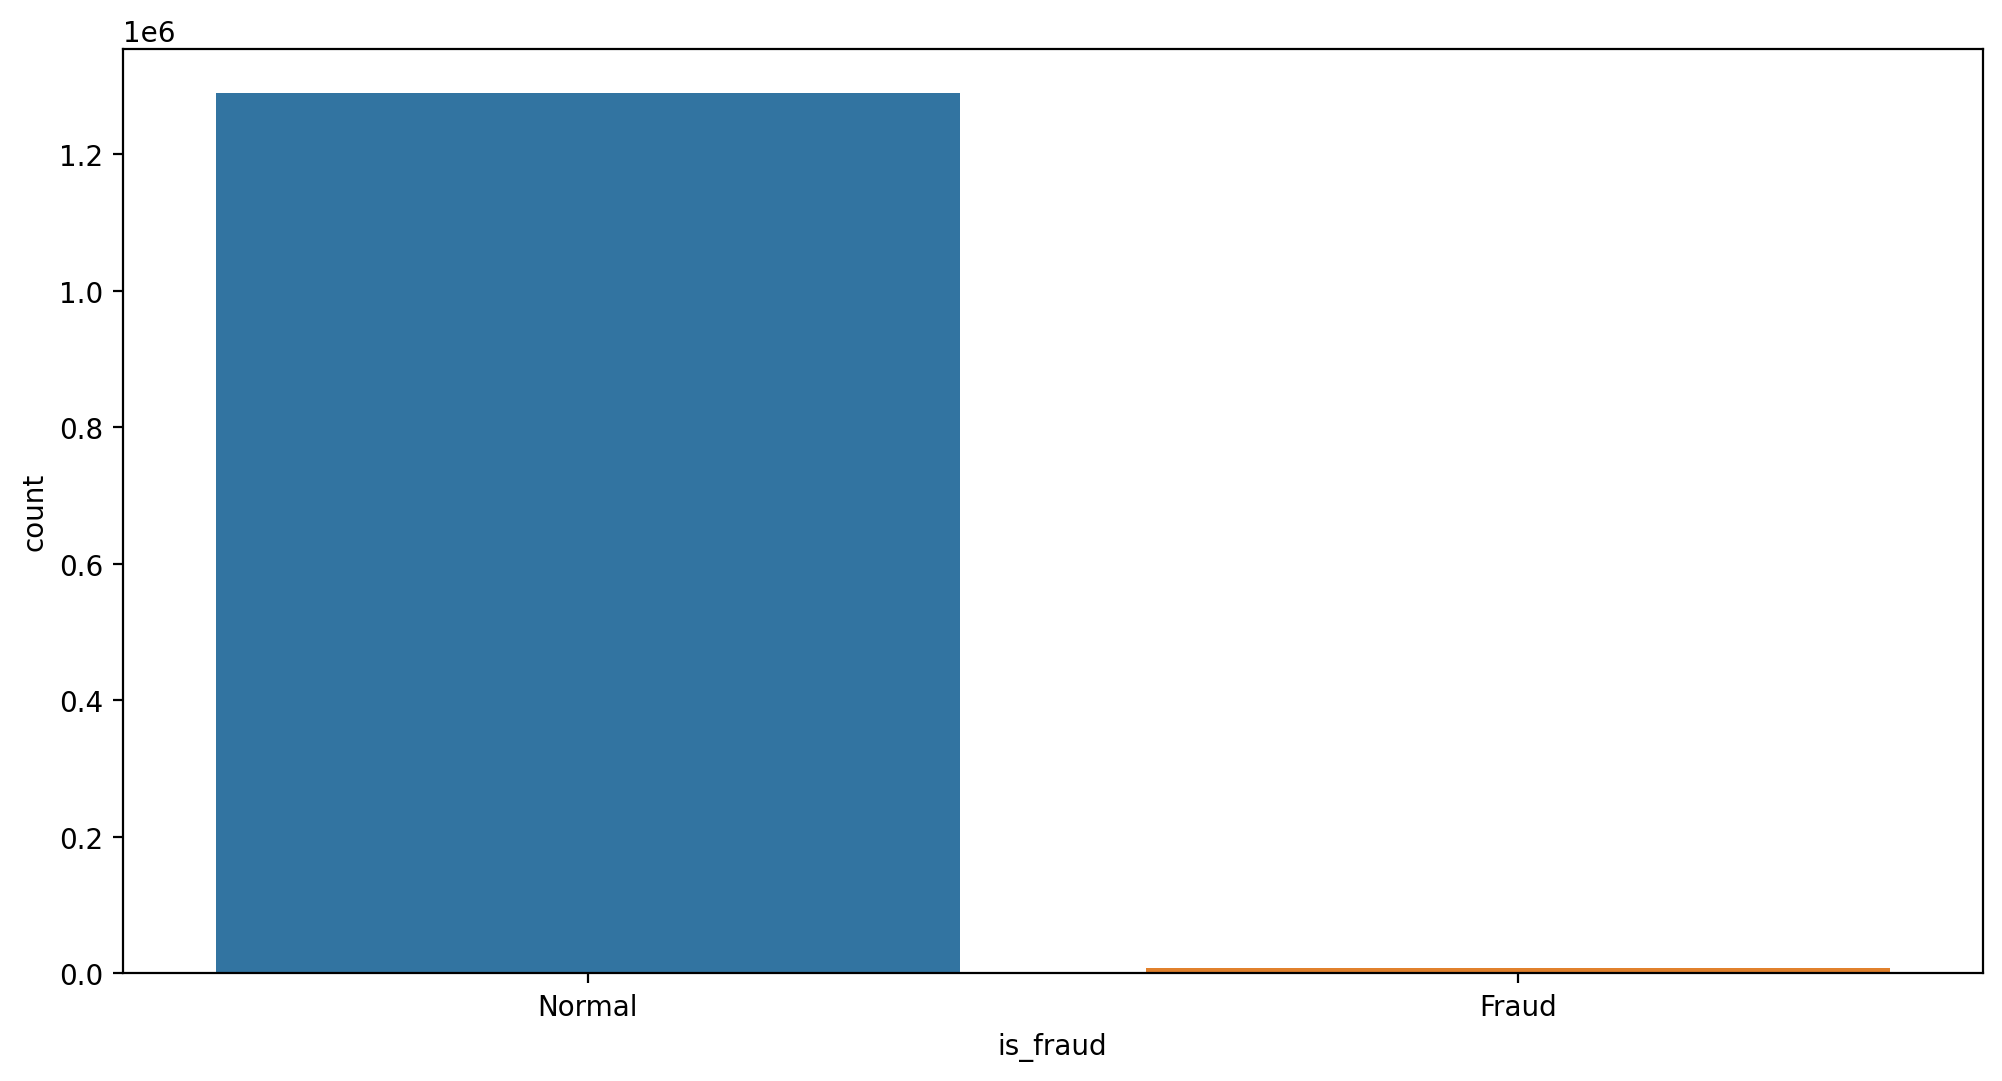

In [12]:
plt.figure(figsize = (12,6),dpi = 200)
sns.countplot(x = train_df['is_fraud'])
plt.xticks(range(2), LABELS)

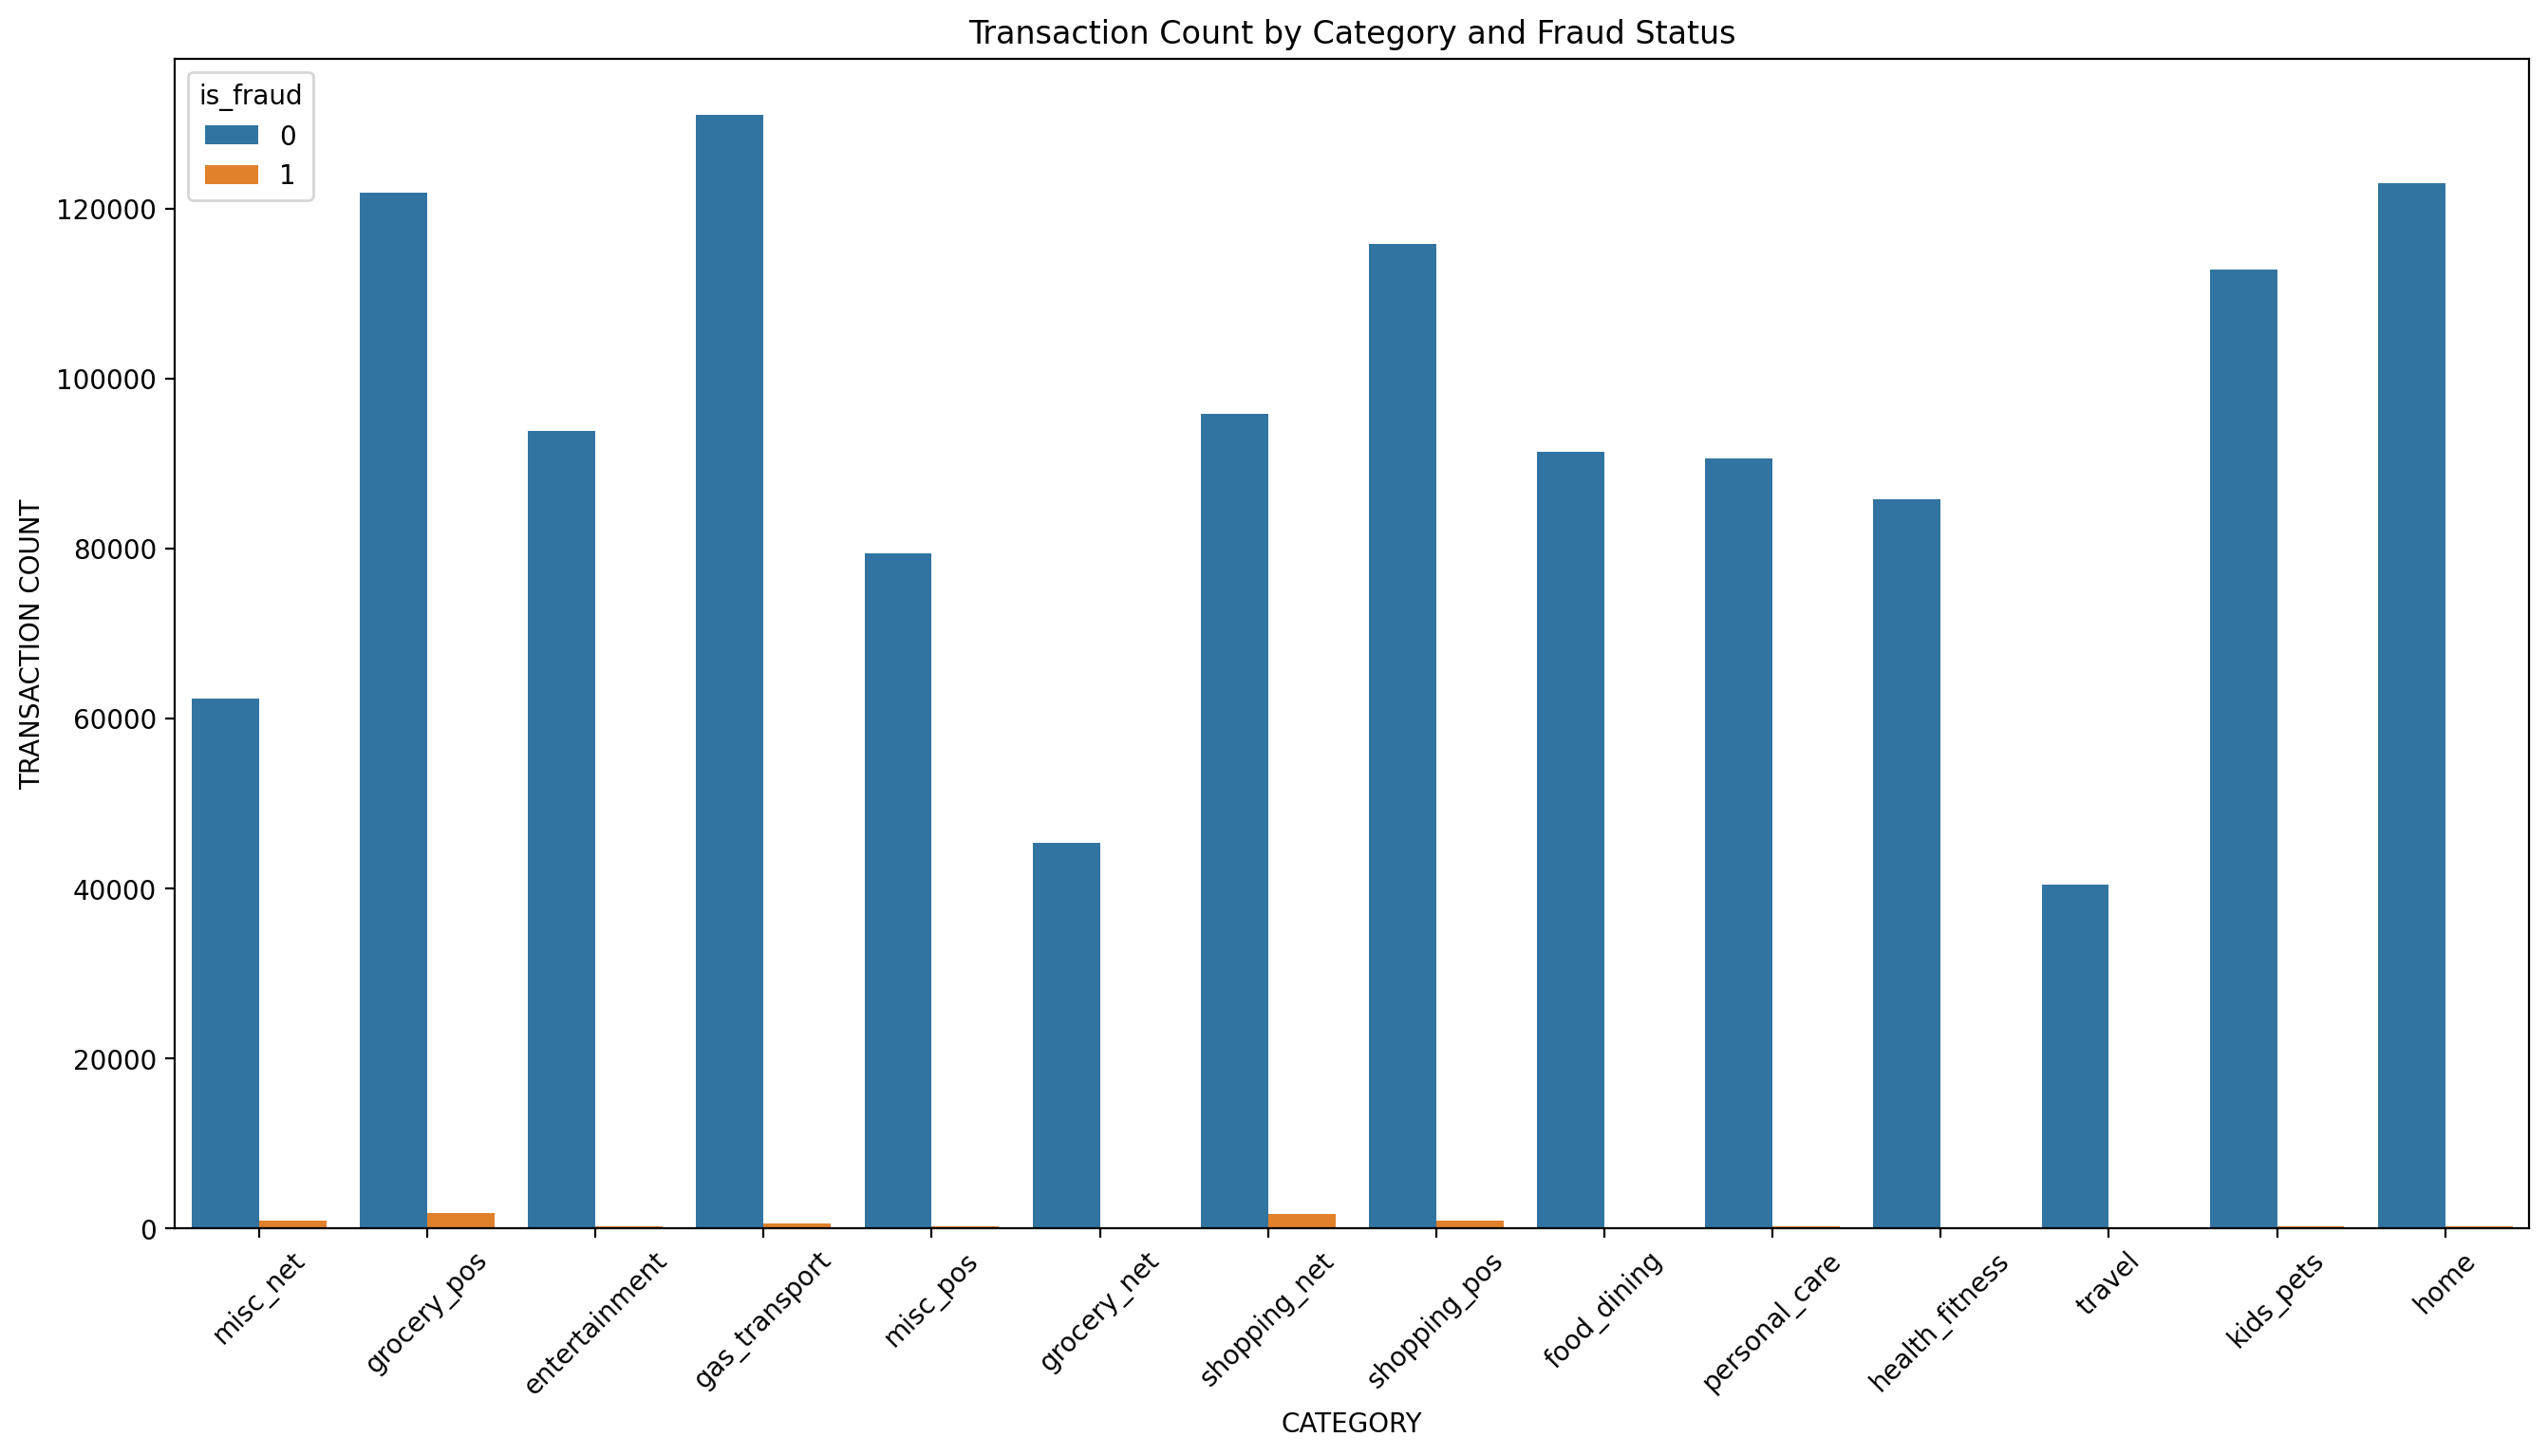

In [13]:

train_df['category'] = train_df['category'].astype(str)
train_df['is_fraud'] = train_df['is_fraud'].astype(str)

plt.figure(figsize=(16, 8), dpi=200)
sns.countplot(x='category', hue='is_fraud', data=train_df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees
plt.title("Transaction Count by Category and Fraud Status")
plt.xlabel("CATEGORY")
plt.ylabel("TRANSACTION COUNT")
plt.show()


In [14]:
x = train_df.drop(['is_fraud'], axis=1)
y = train_df['is_fraud']

In [15]:
cols = ['trans_date_trans_time', 'merchant', 'category','first', 'last','gender', 'street',
        'city','state','job','dob','trans_num']
encoder = OrdinalEncoder()
x[cols] = encoder.fit_transform(x[cols])

In [16]:
#SCALING
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [17]:
y = train_df[['is_fraud']].values

In [18]:
print('Independent Features Shape : ',x.shape)
print('Dependent Features Shape : ',  y.shape)

Independent Features Shape :  (1296675, 21)
Dependent Features Shape :  (1296675, 1)


In [19]:
#RESAMPLING
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [20]:
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(x,y)

print('Data  : ',x_sampled.shape)
print('Labels : ',y_sampled.shape)

Data  :  (15012, 21)
Labels :  (15012,)


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled, test_size = 0.2,random_state = 2)

In [22]:
print('Training Data Shape : ',x_train.shape)
print('Training Labels shape: ',y_train.shape)
print('Testing Data Shape : ',x_test.shape)
print('Testing Labels Shape : ',y_test.shape)


Training Data Shape :  (12009, 21)
Training Labels shape:  (12009,)
Testing Data Shape :  (3003, 21)
Testing Labels Shape :  (3003,)


In [23]:
#LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred_train = lr_classifier.predict(x_train)
pred_test = lr_classifier.predict(x_test)

print('Training Accuracy : ' ,accuracy_score(y_train, pred_train))
print('Testing Accuracy : ' ,accuracy_score(y_test, pred_test))



Training Accuracy :  0.7934049462902822
Testing Accuracy :  0.8098568098568099


In [25]:
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1499
           1       0.83      0.78      0.80      1504

    accuracy                           0.81      3003
   macro avg       0.81      0.81      0.81      3003
weighted avg       0.81      0.81      0.81      3003



In [26]:
cm = confusion_matrix(y_test,pred_test)

In [38]:
def plot_confusion_matrix(cm, classes,normalize = False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks = np.arange(len(classes))
    plt.xticks(ticks_marks, classes)
    plt.yticks(ticks_marks, classes)

    if normalize:
        cm = cm.astype('floate') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")

    else:
        print('confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('predicted label')



confusion matrix, without normalization


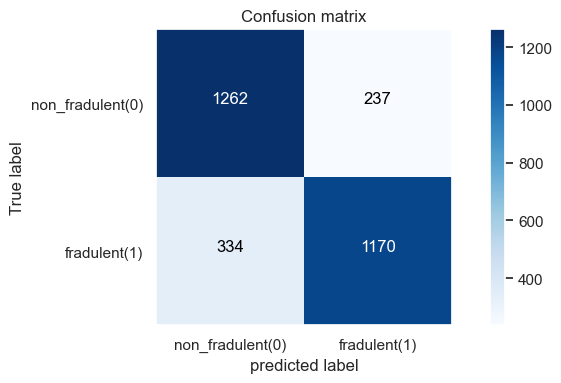

In [39]:
cm = confusion_matrix(y_test, pred_test)
import itertools
plt.figure(figsize = (8,4),dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm,  classes = ['non_fradulent(0)','fradulent(1)'])

In [40]:
#DECISION TREE
dt_classifier = DecisionTreeClassifier(max_depth = 50 ,random_state = 100)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [41]:
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train,pred_train))
print('Testing Accuracy: ', accuracy_score(y_test,pred_test))


Training Accuracy:  1.0
Testing Accuracy:  0.9577089577089577


In [42]:
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1499
           1       0.96      0.96      0.96      1504

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003



confusion matrix, without normalization


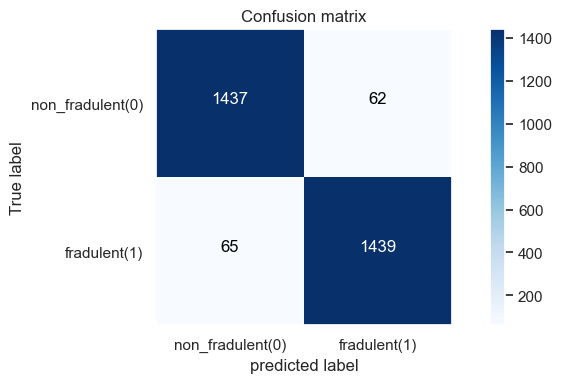

In [45]:
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4),dpi  = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fradulent(0)','fradulent(1)'])

In [46]:
# RANDOM FOREST CLASSIFIER
rf_classifier = RandomForestClassifier(n_estimators = 100,max_depth = 12 , random_state = 2)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [49]:
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)

print('training Accuracy : ',accuracy_score(y_train,pred_train))
print('testing Accuracy  :  ',accuracy_score(y_test,pred_test))


training Accuracy :  0.9711050045798985
testing Accuracy  :   0.9367299367299368


confusion matrix, without normalization


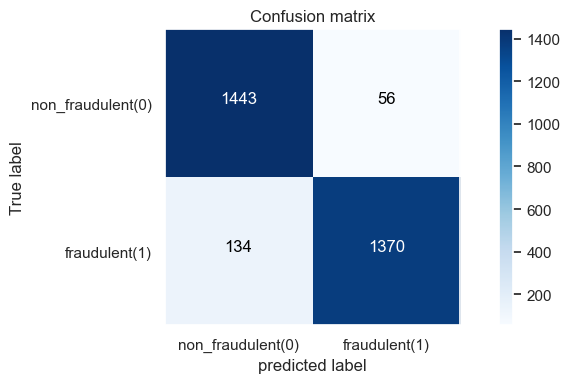

In [50]:
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])